In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import io
from google.colab import files
uploaded = files.upload()
dane_wzrost = pd.read_csv(io.BytesIO(uploaded['Wzrost.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving Wzrost.csv to Wzrost (1).csv


In [ ]:
print(dane_wzrost)



    wzrost
0      156
1      158
2      167
3      188
4      197
5      167
6      197
7      178
8      186
9      157
10     198
11     199
12     178
13     168
14     156
15     151
16     167
17     167


In [ ]:
np.std(dane_wzrost)

wzrost    15.959149
dtype: float64

In [ ]:
np.mean(dane_wzrost)

wzrost    174.166667
dtype: float64

In [ ]:
np.std(dane_wzrost)/np.mean(dane_wzrost) * 100

wzrost    9.163148
dtype: float64

In [ ]:
wspolczynnik_zmiennosci(dane_wzrost)  

In [ ]:
#Normality test
# Tests whether a data sample has a Gaussian distribution.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Interpretation

# H0: the sample has a Gaussian distribution.
# H1: the sample does not have a Gaussian distribution.

# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.655, p=0.000
Probably not Gaussian


In [ ]:
# D’Agostino’s K^2 Test
# Tests whether a data sample has a Gaussian distribution.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Interpretation

# H0: the sample has a Gaussian distribution.
# H1: the sample does not have a Gaussian distribution.


# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
#p - poziom istotności statystycznej (p-value)
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian
stat=3.392, p=0.183
Probably Gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
# Anderson-Darling Test

# Tests whether a data sample has a Gaussian distribution.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Interpretation

# H0: the sample has a Gaussian distribution.
# H1: the sample does not have a Gaussian distribution.

# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [ ]:
# Pearson’s Correlation Coefficient
# Tests whether two samples have a linear relationship.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample are normally distributed.
# Observations in each sample have the same variance.
# Interpretation

# H0: the two samples are independent.
# H1: there is a dependency between the samples.

# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


In [ ]:
# Spearman’s Rank Correlation
# Tests whether two samples have a monotonic relationship.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample can be ranked.
# Interpretation

# H0: the two samples are independent.
# H1: there is a dependency between the samples.

# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


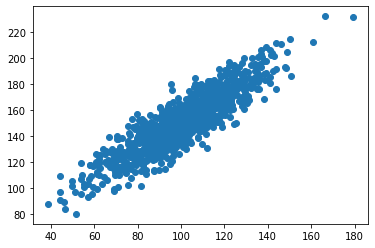

In [ ]:
# Correlation calculation
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [ ]:
import numpy as np
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
covariance = np.cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [ ]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [ ]:
# #Spearman correlation
# Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


In [ ]:
# Chi-Squared Test
# Tests whether two categorical variables are related or independent.

# Assumptions

# Observations used in the calculation of the contingency table are independent.
# 25 or more examples in each cell of the contingency table.
# Interpretation

# H0: the two samples are independent.
# H1: there is a dependency between the samples.

from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


In [ ]:
#Parametric statistical tests

In [ ]:
# Student’s t-test
# Tests whether the means of two independent samples are significantly different.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample are normally distributed.
# Observations in each sample have the same variance.
# Interpretation

# H0: the means of the samples are equal.
# H1: the means of the samples are unequal.


# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution
stat=-0.326, p=0.748
Probably the same distribution


In [ ]:
# Analysis of Variance Test (ANOVA)
# Tests whether the means of two or more independent samples are significantly different.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample are normally distributed.
# Observations in each sample have the same variance.
# Interpretation

# H0: the means of the samples are equal.
# H1: one or more of the means of the samples are unequal.


# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution
stat=0.096, p=0.908
Probably the same distribution


In [ ]:
# Nonparametric Statistical Hypothesis Tests


In [ ]:
# Mann-Whitney U Test
# Tests whether the distributions of two independent samples are equal or not.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample can be ranked.
# Interpretation

# H0: the distributions of both samples are equal.
# H1: the distributions of both samples are not equal.

# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


In [ ]:
#Wilcoxon test
# Tests whether the distributions of two paired samples are equal or not.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample can be ranked.
# Observations across each sample are paired.
# Interpretation

# H0: the distributions of both samples are equal.
# H1: the distributions of both samples are not equal.

from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.508
Probably the same distribution


In [ ]:
# Kruskal-Wallis H Test
# Tests whether the distributions of two or more independent samples are equal or not.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample can be ranked.
# Interpretation

# H0: the distributions of all samples are equal.
# H1: the distributions of one or more samples are not equal.

from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


In [ ]:
# Friedman Test
# Tests whether the distributions of two or more paired samples are equal or not.

# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample can be ranked.
# Observations across each sample are paired.
# Interpretation

# H0: the distributions of all samples are equal.
# H1: the distributions of one or more samples are not equal.

from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
